# Project: Wrangling and Analyze Data

In [1]:
# IMPORTING THE REQUIRED PACKAGES AND SETTING PREFERRED STYLES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 100, "display.max_columns", 100)
sns.set_style('darkgrid')

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# LOAD THE TWITTER ARCHIVE ENHANCED DATASET AND PRINT ITS SHAPE
enhanced = pd.read_csv("twitter_archive_enhanced.csv")
enhanced.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# USING THE PYTHON REQUESTS LIBRARY, SCRAPE THE TWEET IMAGE PREDICTION DATASET FROM THE GIVEN WEB LINK
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# SAVE THE SCRAPED DATA TO A FILE

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [4]:
# LOAD THE TWEET IMAGE PREDICTION DATASET TO A DATAFRAME CALLED 'IMAGE' AND PRINT ITS SHAPE
image = pd.read_csv("image_predictions.tsv", sep = '\t')
image.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

I utilized the tweet-json.txt file provided by Udacity because I was not able to secure a twitter developer's account.

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

From the above cell, I was able to understand how the Tweepy API can be used to scrape data from a website or database. the required libraries were imported and authentication keys and tokens were set.

The tweet_idfrom the "twitter_archive_enhanced.csv" file was used to query al the tweets from the WeRateDogs Twitter archive. Also the process was monitored with the help of the Pythom timeit module.

The resulting output was saved in an external file named "tweet-json.txt".

In [5]:
# READ THE QUERIED DATA LINE BY LINE, LOAD TO A DATAFRAME CALLED 'TWEET' AND PRINT ITS SHAPE
tweet = pd.DataFrame()

with open('tweet-json.txt') as file:
    for json_obj in file:
        json_dict = json.loads(json_obj)
        json_series = pd.Series(json_dict, index = json_dict.keys())
        tweet = tweet.append(json_series, ignore_index=True)
tweet.shape

(2354, 31)

###### REFERENCES
> https://pynative.com/python-parse-multiple-json-objects-from-file/#:~:text=%20To%20Load%20and%20parse%20a%20JSON%20file,into%20a%20list%20called%20result%20jsonList.%20More


> https://sparkbyexamples.com/pandas/pandas-convert-json-to-dataframe/#:~:text=The%20json_normalize%20%28%29%20function%20is%20used%20to%20convert,to%20json_normalize%20%28%29%2C%20which%20returns%20a%20Pandas%20DataFrame.

## Assessing Data

### Visual Assessment

In [6]:
# VISUALLY ASSESS THE ENHANCED TABLE
enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
# VISUALLY ASSESS THE IMAGE TABLE
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
# VISUALLY ASSESS THE TWEET TABLE
tweet

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status_id_str,retweeted_status,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,8.924206e+17,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,0.0,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,0.0,8853.0,39467.0,0.0,0.0,0.0,0.0,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,8.921774e+17,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,6514.0,33819.0,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,8.918152e+17,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,4328.0,25461.0,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,8.916896e+17,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8964.0,42908.0,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,8.913276e+17,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,9774.0,41048.0,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,6.660492e+17,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,41.0,111.0,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,6.660442e+17,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,147.0,311.0,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,6.660334e+17,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...

### Programmatic Assessment

##### ENHANCED TABLE

In [9]:
# CHECK BASIC INFORMATION OF THE DATAFRAME
enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

There are several missing values.

In [10]:
# CHECK FOR DUPLICATED DATA
enhanced.duplicated().sum()

0

There are no duplicated entries.

In [11]:
# DISPLAY THE DESCRIPIVE STATISTICS
enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# CHECK THE UNIQUE VALUES AND THEIR COUNT IN DOGGO COLUMN
enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
# CHECK THE UNIQUE VALUES AND THEIR COUNT IN FLOOFER COLUMN
enhanced.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
# CHECK THE UNIQUE VALUES AND THEIR COUNT IN PUPPER COLUMN
enhanced.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [15]:
# CHECK THE UNIQUE VALUES AND THEIR COUNT IN PUPPO COLUMN
enhanced.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [16]:
# CHECK THE UNIQUE VALUES AND THEIR COUNT IN NAME COLUMN
enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [17]:
# CHECK THE UNIQUE VALUES AND THEIR COUNT IN RATING_DENOMINATOR COLUMN
enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

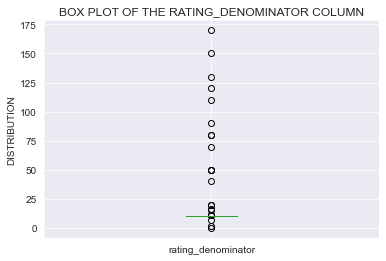

In [18]:
# THE DISTRIBUTION OF VALUES IN THE RATING_DENOMINATOR COLUMN
enhanced.rating_denominator.plot(kind = 'box');
plt.title("BOX PLOT OF THE RATING_DENOMINATOR COLUMN");
plt.ylabel("DISTRIBUTION");

##### IMAGE TABLE

In [19]:
# CHECK BASIC INFORMATION OF THE DATAFRAME
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# CHECK FOR DUPLICATED DATA
image.duplicated().sum()

0

In [21]:
# DISPLAY THE DESCRIPIVE STATISTICS
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
# CHECK THE UNIQUE VALUES AND THEIR COUNT IN IMG_NUM COLUMN
image['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

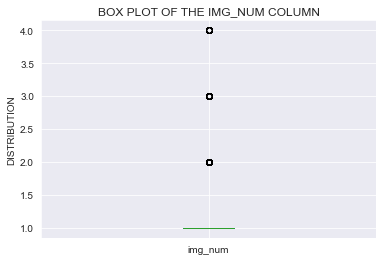

In [23]:
# THE DISTRIBUTION OF VALUES IN THE IMG_NUM COLUMN
image.img_num.plot(kind = 'box');
plt.title("BOX PLOT OF THE IMG_NUM COLUMN");
plt.ylabel("DISTRIBUTION");

##### TWEET TABLE

In [24]:
# CHECK BASIC INFORMATION OF THE DATAFRAME
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   float64
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   object 
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     object 
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     object 
 12  in_reply_to_user_id_str        78 non-null     o

In [25]:
# DISPLAY THE DESCRIPIVE STATISTICS
tweet.describe()

,id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,79515.000000,132810.000000,8.860534e+17


In [26]:
tweet['truncated'].value_counts()

0.0    2354
Name: truncated, dtype: int64

In [27]:
# DEFINE A PYTHON FUNCTION TO CHECK THE SIMILARITY IN COLUMNS OF DATAFRAMES
def check(df1, df2):
    col1 = sorted(df1.columns.tolist())
    col2 = sorted(df2.columns.tolist())
    for i in col1:
        if i in col2:
            print(i)
check(enhanced, tweet)

in_reply_to_status_id
in_reply_to_user_id
source


### Quality issues
1. Retweets need to be removed.

2. Timestamp, retweeted_status_timestamp and created_at columns in Enhanced and Tweet tables  have object datatype whereas they should be Datetime.

3. The displayed value of first entry in the 'truncated', 'is_quote_status', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable' columns of the Tweet table is '0.0' whereas it was 'false' when viewed with Notepad++ Application.

4. Null values represented as 'None' in 'doggo', 'floofer', 'pupper', and 'puppo' columns.

5. Incorrect Dog names.

6. Id column datatype in Tweet table is float and not integer.

7. Column name inconsistency ('Id_str' instead of 'Tweet_id' in Tweet table).

8. Invalid rating

9. Missing data in both Enhanced and Tweet tables.

### Tidiness issues
1. 'in_reply_to_status_id', 'in_reply_to_user_id', and 'source' columns in Enhanced table duplicated in Tweet table.

2.  'doggo', 'floofer', 'pupper', and 'puppo' columns should make up a single column which represented all the stages.

## Cleaning Data

In [28]:
# Make copies of original pieces of data
enhanced_clean = enhanced.copy()
image_clean = image.copy()
tweet_clean = tweet.copy()

### QUALITY

### Issue #1: Retweets need to be removed.

#### Define: Subset the enhanced_clean dataframe using the isnull() method to filter the 'retweeted_status_user_id' column

#### Code

In [29]:
enhanced_clean = enhanced_clean[enhanced_clean['retweeted_status_user_id'].isnull()].reset_index(drop = True)

#### Test

In [30]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [31]:
enhanced_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2171,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2172,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2173,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Issue #2: Timestamp, retweeted_status_timestamp and created_at columns in Enhanced and Tweet tables  have object datatype whereas they should be Datetime.

#### Define:  Apply the Pandas to_datetime() method on the columns to transform them to Datetime datatype

#### Code

In [32]:
enhanced_clean['timestamp'] = pd.to_datetime(enhanced_clean['timestamp'])
enhanced_clean['retweeted_status_timestamp'] = pd.to_datetime(enhanced_clean['retweeted_status_timestamp'])
tweet_clean['created_at'] = pd.to_datetime(tweet_clean['created_at'])

#### Test

In [33]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

In [34]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   float64            
 2   id_str                         2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   object             
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     object             
 10  in_reply_to_status_id_st

### Issue #3: The displayed value of first entry in the 'truncated', 'is_quote_status', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable' columns of the Tweet table is '0.0' whereas it was 'false' when viewed with Notepad++ Application.

#### Define: Apply the astype() method to transform the content of the columns to string and then replace the floating point value with 'False'.

#### Code

In [35]:
tweet_clean[['truncated', 'is_quote_status', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable']] = tweet_clean[['truncated', 'is_quote_status', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable']].astype('str').replace('0.0', 'False')

#### Test

In [36]:
tweet_clean.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status_id_str,retweeted_status,quoted_status
0,2017-08-01 16:23:56+00:00,8.924206e+17,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853.0,39467.0,False,False,False,False,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,8.921774e+17,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,6514.0,33819.0,False,False,False,False,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,8.918152e+17,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,4328.0,25461.0,False,False,False,False,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,8.916896e+17,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8964.0,42908.0,False,False,False,False,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,8.913276e+17,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,9774.0,41048.0,False,False,False,False,en,NaN,NaN,NaN,NaN


### Issue #4: Null values represented as 'None' in 'doggo', 'floofer', 'pupper', and 'puppo' columns.

#### Define: Define a Python function to replace the values and perform a function call to effect the changes.

#### Code

In [37]:
# DEFINE A PYTHON FUNCTION TO REPLACE NONE WITH AN EMPTY STRING

def change(df, col):
    df[col] = df[col].replace('None', '')
    return df[col]

enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']] = change(enhanced_clean, col = ['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [38]:
enhanced_clean.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,,,,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,,,,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,


### Issue #5: Incorrect Dog names.

#### Define: Replace the values of 'None' and other invalid names in the column with NaN.

#### Code

In [39]:
invalid_names = list(enhanced_clean[enhanced_clean.name.str.islower()].name.unique())
invalid_names.append('None')
invalid_names

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space',
 'None']

In [40]:
enhanced_clean['name'].replace(invalid_names, np.nan, inplace = True)

#### Test

In [41]:
# CHECK THE UNIQUE VALUES AND THEIR COUNT IN NAME COLUMN
enhanced_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 930, dtype: int64

In [42]:
# CHECK THE UNIQUE VALUES IN NAME COLUMN
enhanced_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


### Issue #6: Id column datatype in Tweet table is float and not integer.

#### Define:  Apply the astype() method to transform the content of the column to integer. 

#### Code

In [43]:
tweet_clean['id'] = tweet_clean['id'].astype('int64')

#### Test

In [44]:
tweet_clean.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status_id_str,retweeted_status,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336192,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853.0,39467.0,False,False,False,False,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343424,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,6514.0,33819.0,False,False,False,False,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,4328.0,25461.0,False,False,False,False,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8964.0,42908.0,False,False,False,False,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,9774.0,41048.0,False,False,False,False,en,NaN,NaN,NaN,NaN


Comparing the 'id' and 'id_str' column, there seems to be some discrepancies in some of the new values. To resolve this, we would use the column 'id_str' and drop 'id' column.

In [45]:
# DROP THE ID COLUMN
tweet_clean.drop('id', axis = 1, inplace = True)

In [46]:
# TRANSFORM THE ID_STR COLUMN TO AN INTEGER TYPE
tweet_clean['id_str'] = tweet_clean['id_str'].astype('int64')

In [47]:
# CHECK
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id_str                         2354 non-null   int64              
 2   full_text                      2354 non-null   object             
 3   truncated                      2354 non-null   object             
 4   display_text_range             2354 non-null   object             
 5   entities                       2354 non-null   object             
 6   extended_entities              2073 non-null   object             
 7   source                         2354 non-null   object             
 8   in_reply_to_status_id          78 non-null     object             
 9   in_reply_to_status_id_str      78 non-null     object             
 10  in_reply_to_user_id     

### Issue #7: Column name inconsistency ('Id_str' instead of 'Tweet_id' in Tweet table).

#### Define: Rename the 'id_str' column to 'tweet_id'.

#### Code

In [48]:
tweet_clean.rename(columns = {'id_str': 'tweet_id'}, inplace = True)

#### Test

In [49]:
tweet_clean.head()

,created_at,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status_id_str,retweeted_status,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853.0,39467.0,False,False,False,False,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,6514.0,33819.0,False,False,False,False,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,4328.0,25461.0,False,False,False,False,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8964.0,42908.0,False,False,False,False,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,9774.0,41048.0,False,False,False,False,en,NaN,NaN,NaN,NaN


##### QUALITY ISSUE #8: Invalid Rating

#### Define: Visually inspect the entries with denominator != 10, note down the indexes of entries with invalid rating and drop them.

#### Code

In [50]:
enhanced_clean[enhanced_clean['rating_denominator'] != 10][['text','rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
263,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
287,@docmisterio account started on 11/15/15,11,15
363,The floofs have been released I repeat the flo...,84,70
429,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
733,Why does this never happen at my front door......,165,150
890,"After so many requests, this is Bretagne. She ...",9,11
942,Say hello to this unbelievably well behaved sq...,204,170
987,Happy 4/20 from the squad! 13/10 for all https...,4,20
1024,This is Bluebert. He just saw that both #Final...,50,50
1050,Happy Saturday here's 9 puppers on a bench. 99...,99,90


In [51]:
enhanced_clean.drop(index = [263,287,429,890,987,1024,1483,2154], axis = 0, inplace = True)

In [52]:
enhanced_clean.reset_index(drop = True, inplace = True)

#### Test

In [53]:
enhanced_clean[enhanced_clean['rating_denominator'] != 10][['text','rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
361,The floofs have been released I repeat the flo...,84,70
730,Why does this never happen at my front door......,165,150
938,Say hello to this unbelievably well behaved sq...,204,170
1044,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1069,Here's a brigade of puppers. All look very pre...,80,80
1089,"From left to right:\nCletus, Jerome, Alejandro...",45,50
1166,Here is a whole flock of puppers. 60/50 I'll ...,60,50
1248,Happy Wednesday here's a bucket of pups. 44/40...,44,40
1413,Yes I do realize a rating of 4/20 would've bee...,4,20
1449,"Two sneaky puppers were not initially seen, mo...",143,130


##### QUALITY ISSUE #9 would be addressed after fixing the TIDINESS ISSUES.

### TIDINESS

### Issue #1: 'in_reply_to_status_id', 'in_reply_to_user_id', and 'source' columns in Enhanced table duplicated in Tweet table.

#### Define: Drop the duplicated columns in tweet_clean table

#### Code

In [54]:
tweet_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source'], axis = 1, inplace = True)

#### Test

In [55]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   full_text                      2354 non-null   object             
 3   truncated                      2354 non-null   object             
 4   display_text_range             2354 non-null   object             
 5   entities                       2354 non-null   object             
 6   extended_entities              2073 non-null   object             
 7   in_reply_to_status_id_str      78 non-null     object             
 8   in_reply_to_user_id_str        78 non-null     object             
 9   in_reply_to_screen_name        78 non-null     object             
 10  user                    

### Issue #2: 'doggo', 'floofer', 'pupper', and 'puppo' columns should make up a single column which represented all the stages.

#### Define: Concatenate the 4 columns to form 'stage' column and later drop them.

#### Code

In [56]:
enhanced_clean['stage'] = enhanced_clean['doggo'] + enhanced_clean['floofer'] + enhanced_clean['pupper'] + enhanced_clean['puppo']

In [57]:
# DROP THE 'doggo', 'floofer', 'pupper', 'puppo' COLUMNS
enhanced_clean = enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [58]:
# REPLACE THE EMPTY STRINGS IN THE STAGE COLUMN WITH NONE 
enhanced_clean['stage'] = enhanced_clean['stage'].astype(str).replace('', 'None')

#### Test

In [59]:
enhanced_clean.stage.value_counts()

None            1823
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

For overlapping stages, separate them with a "/"

In [60]:
enhanced_clean['stage'] = enhanced_clean['stage'].astype(str).replace('doggopupper', 'doggo/pupper')
enhanced_clean['stage'] = enhanced_clean['stage'].astype(str).replace('doggopuppo', 'doggo/puppo')
enhanced_clean['stage'] = enhanced_clean['stage'].astype(str).replace('doggofloofer', 'doggo/floofer')

In [61]:
enhanced_clean.stage.value_counts()

None             1823
pupper            224
doggo              75
puppo              24
doggo/pupper       10
floofer             9
doggo/puppo         1
doggo/floofer       1
Name: stage, dtype: int64

### Quality Issue #9: Missing data in both Enhanced and Tweet tables.

#### Define: Drop columns with more than 50% value missing

#### Code

In [62]:
# DEFINE A PYTHON FUNCTION TO DROP COLUMNS WITH MISSING VALUES
def drop(df):
    df = df.dropna(thresh = int(0.5*len(df)), axis = 1, inplace = True)
    return df
drop(tweet_clean)
drop(enhanced_clean)

#### Test

In [63]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2167 non-null   int64              
 1   timestamp           2167 non-null   datetime64[ns, UTC]
 2   source              2167 non-null   object             
 3   text                2167 non-null   object             
 4   expanded_urls       2111 non-null   object             
 5   rating_numerator    2167 non-null   int64              
 6   rating_denominator  2167 non-null   int64              
 7   name                1388 non-null   object             
 8   stage               2167 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 152.5+ KB


In [64]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   full_text                      2354 non-null   object             
 3   truncated                      2354 non-null   object             
 4   display_text_range             2354 non-null   object             
 5   entities                       2354 non-null   object             
 6   extended_entities              2073 non-null   object             
 7   user                           2354 non-null   object             
 8   is_quote_status                2354 non-null   object             
 9   retweet_count                  2354 non-null   float64            
 10  favorite_count          

In [65]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Merge the three dataframes together

In [66]:
merged_df = pd.merge(enhanced_clean, tweet_clean, how = 'left', on = 'tweet_id').merge(image_clean, how = 'left', on = 'tweet_id').reset_index(drop = True)

In [67]:
merged_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,created_at,full_text,truncated,display_text_range,entities,extended_entities,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853.0,39467.0,False,False,False,False,en,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514.0,33819.0,False,False,False,False,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328.0,25461.0,False,False,False,False,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964.0,42908.0,False,False,False,False,en,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774.0,41048.0,False,False,False,False,en,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [68]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2167 non-null   int64              
 1   timestamp                      2167 non-null   datetime64[ns, UTC]
 2   source                         2167 non-null   object             
 3   text                           2167 non-null   object             
 4   expanded_urls                  2111 non-null   object             
 5   rating_numerator               2167 non-null   int64              
 6   rating_denominator             2167 non-null   int64              
 7   name                           1388 non-null   object             
 8   stage                          2167 non-null   object             
 9   created_at                     2167 non-null   datetime64[ns, UTC]
 10  full_text               

To deal with the missing data, fill the columns with object datatype with 'None', columns with float datatype with '0.0', and columns with datetime datatype with the median of the respective column.

In [69]:
num_col = merged_df.select_dtypes(include = np.number).columns.to_list()
obj_col = merged_df.select_dtypes(include = 'object').columns.to_list()
date = merged_df.select_dtypes(include = 'datetime64[ns, UTC]').columns.to_list()

for col in merged_df.columns.to_list():
    if col in num_col:
        merged_df[col].fillna(0.0, inplace = True)
    elif col in obj_col:
        merged_df[col].fillna('None', inplace = True)
    elif col in date:
        merged_df[col].fillna(merged_df[col].median(), inplace = True)

In [70]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2167 non-null   int64              
 1   timestamp                      2167 non-null   datetime64[ns, UTC]
 2   source                         2167 non-null   object             
 3   text                           2167 non-null   object             
 4   expanded_urls                  2167 non-null   object             
 5   rating_numerator               2167 non-null   int64              
 6   rating_denominator             2167 non-null   int64              
 7   name                           2167 non-null   object             
 8   stage                          2167 non-null   object             
 9   created_at                     2167 non-null   datetime64[ns, UTC]
 10  full_text               

Now, the dataframe is clean and can be stored as a csv file

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [71]:
merged_df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

In [72]:
# RETWEET COUNT BY NAME
merged_df.groupby(['retweet_count','name'])['retweet_count'].max().sort_values(ascending = False).head(10)

retweet_count  name   
79515.0        None       79515.0
56625.0        Stephan    56625.0
52360.0        None       52360.0
48265.0        None       48265.0
45849.0        Duddles    45849.0
42228.0        Bo         42228.0
37911.0        None       37911.0
33421.0        None       33421.0
32883.0        Jamesy     32883.0
31989.0        Kenneth    31989.0
Name: retweet_count, dtype: float64

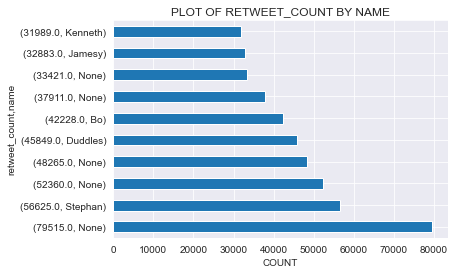

In [73]:
merged_df.groupby(['retweet_count','name'])['retweet_count'].max().sort_values(ascending = False).head(10).plot(kind = 'barh');
plt.title('PLOT OF RETWEET_COUNT BY NAME');
plt.xlabel('COUNT');

In [74]:
# FAVORITE COUNT BY NAME
merged_df.groupby(['favorite_count','name'])['favorite_count'].max().sort_values(ascending = False).head(10)

favorite_count  name   
132810.0        None       132810.0
131075.0        None       131075.0
107956.0        Duddles    107956.0
107015.0        Stephan    107015.0
106827.0        Jamesy     106827.0
95450.0         Bo          95450.0
85011.0         Zoey        85011.0
75639.0         None        75639.0
75193.0         None        75193.0
75163.0         None        75163.0
Name: favorite_count, dtype: float64

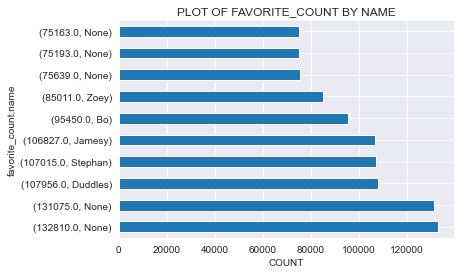

In [75]:
merged_df.groupby(['favorite_count','name'])['favorite_count'].max().sort_values(ascending = False).head(10).plot(kind = 'barh');
plt.title('PLOT OF FAVORITE_COUNT BY NAME');
plt.xlabel('COUNT');

In [76]:
# RATING BY NAME
merged_df.groupby(['rating_numerator','name'])['rating_numerator'].max().sort_values(ascending = False).head(10)

rating_numerator  name   
1776              Atticus    1776
666               None        666
420               None        420
204               None        204
182               None        182
165               None        165
144               None        144
143               None        143
121               None        121
99                None         99
Name: rating_numerator, dtype: int64

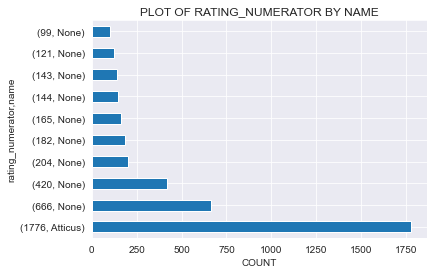

In [77]:
merged_df.groupby(['rating_numerator','name'])['rating_numerator'].max().sort_values(ascending = False).head(10).plot(kind = 'barh');
plt.title('PLOT OF RATING_NUMERATOR BY NAME');
plt.xlabel('COUNT');

In [78]:
merged_df[merged_df['rating_numerator'].isin([1776, 666, 420])]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,created_at,full_text,truncated,display_text_range,entities,extended_entities,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
162,855862651834028034,2017-04-22 19:15:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,None,420,10,None,None,2017-04-22 19:15:32+00:00,@dhmontgomery We also gave snoop dogg a 420/10...,False,"[14, 86]","{'hashtags': [], 'symbols': [], 'user_mentions...",None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,27.0,320.0,False,False,nan,nan,en,None,0.0,None,0.000000,None,None,0.000000,None,None,0.000000,None
163,855860136149123072,2017-04-22 19:05:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,None,666,10,None,None,2017-04-22 19:05:32+00:00,@s8n You tried very hard to portray this good ...,False,"[5, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...",None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,1058.0,4407.0,False,False,nan,nan,en,None,0.0,None,0.000000,None,None,0.000000,None,None,0.000000,None
801,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,2016-07-04 15:00:45+00:00,This is Atticus. He's quite simply America af....,False,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 749850882955702272, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,2772.0,5569.0,False,False,False,False,en,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
1888,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,2015-11-29 05:52:33+00:00,After so many requests... here you go.\n\nGood...,False,"[0, 81]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670842759008411648, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4324.0,7989.0,False,False,False,False,en,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1.0,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False


In [79]:
# GET THE URL FOR THE IMAGE OF THE MOST RATED DOG
merged_df[merged_df['rating_numerator'] == 1776]['jpg_url']

801    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

MOST RATED DOG - "ATTICUS"


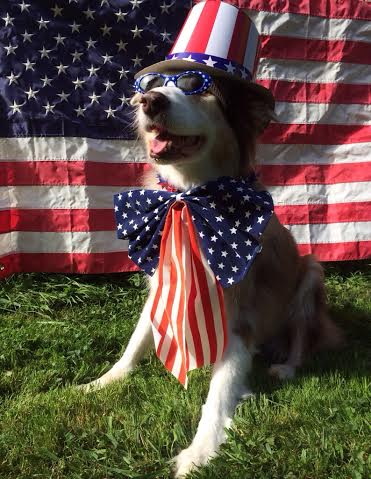

In [82]:
# DISPLAY THE IMAGE OF THE MOST RATED DOG
from IPython.display import display, Image
print('MOST RATED DOG - "ATTICUS"')
display(Image(r'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg'))

### Insights
##### From the above visualizations, the following insights can be deduced:
<ol>
<li>The name of the dog with the highest number of retweets of 79,515 is not given in the dataset. Meanwhile, Stephan had the second highest number of retweets (56,625). Also, the name of the dog with the third highest number of retweets (52,360) is not given in the dataset.</li>
<li>The names of the two dogs with the highest number of likes were not given in the dataset with the first dog having a total of 132,810 likes and the second having a total of 131,075 likes. Furthermore, Duddles had a total of 107,956 likes making him the third most liked dog.</li>
<li>The most rated dog in the dataset is "Atticus" having a rating of 1776/10. The second and third most rated dogs had 666/10 and 420/10 respectively.</li>